<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/SensorMobileRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4d852b11de03406af4d9ea3a94f4bf06b960c88a5fa0b096190a051d612250fc
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


76.86586647347669
49.99994796940917


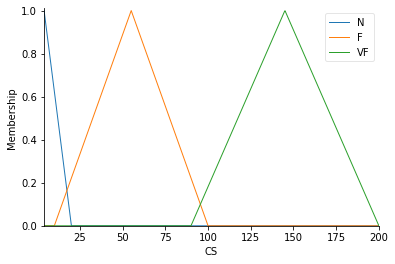

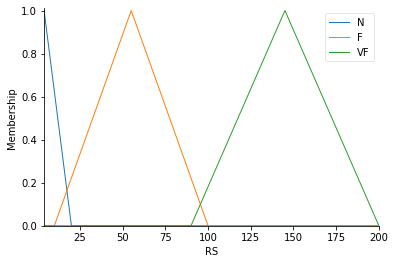

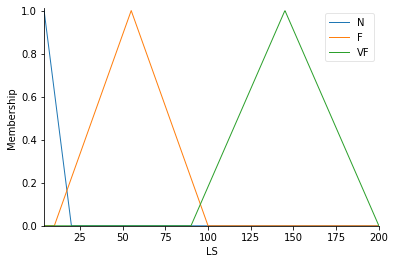

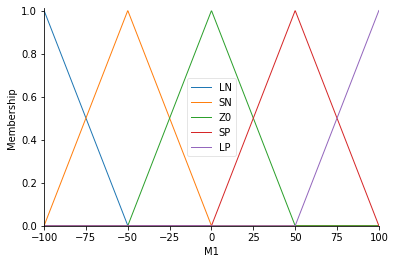

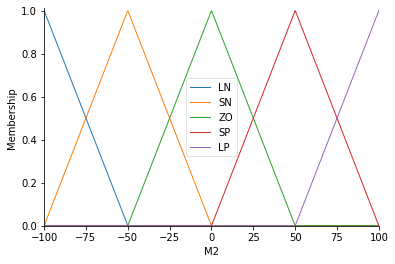

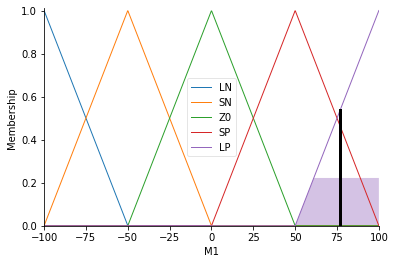

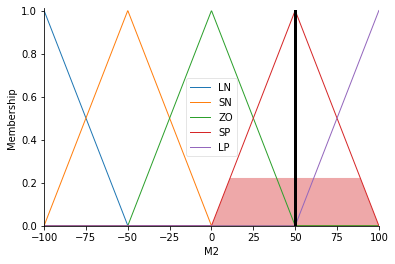

In [4]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Input
LS = ctrl.Antecedent(np.linspace(4, 200, 1000), 'LS')   # Left Sensor
RS = ctrl.Antecedent(np.linspace(4, 200, 1000), 'RS')   # Right Sensor
CS = ctrl.Antecedent(np.linspace(4, 200, 1000), 'CS')   # Center Sensor

# Output 
ML = ctrl.Consequent(np.linspace(-100, 100, 1000), 'ML') # Left Motor
MR = ctrl.Consequent(np.linspace(-100, 100, 1000), 'MR') # Right Motor

# Membership functions
CS['N']  = fuzz.trimf(LS.universe,[ 4,   4, 20 ])
CS['F']  = fuzz.trimf(LS.universe,[10,  55, 100])
CS['VF'] = fuzz.trimf(LS.universe,[90, 145, 200])
CS.view()

RS['N']  = fuzz.trimf(LS.universe,[ 4,   4, 20 ])
RS['F']  = fuzz.trimf(LS.universe,[10,  55, 100])
RS['VF'] = fuzz.trimf(LS.universe,[90, 145, 200])
RS.view()

LS['N']  = fuzz.trimf(LS.universe,[ 4,   4, 20 ])
LS['F']  = fuzz.trimf(LS.universe,[10,  55, 100])
LS['VF'] = fuzz.trimf(LS.universe,[90, 145, 200])
LS.view()

ML['LN'] = fuzz.trimf(ML.universe,[-100, -100, -50])
ML['SN'] = fuzz.trimf(ML.universe,[-100,  -50, 0  ])
ML['Z0'] = fuzz.trimf(ML.universe,[ -50,    0, 50 ])
ML['SP'] = fuzz.trimf(ML.universe,[   0,   50, 100])
ML['LP'] = fuzz.trimf(ML.universe,[  50,  100, 100])
ML.view()

MR['LN'] = fuzz.trimf(MR.universe,[-100, -100, -50])
MR['SN'] = fuzz.trimf(MR.universe,[-100,  -50, 0  ])
MR['ZO'] = fuzz.trimf(MR.universe,[ -50,    0, 50 ])
MR['SP'] = fuzz.trimf(MR.universe,[   0,   50, 100])
MR['LP'] = fuzz.trimf(MR.universe,[  50,  100, 100])
MR.view()
# Rules
MLrule = []
MRrule = []

MLrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['N'] , ML['ZO']))
MLrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['F'] , ML['SN']))
MLrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['VF'], ML['SN']))
MLrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['N'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['F'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['VF'], ML['SN']))
MLrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['N'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['F'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['VF'], ML['SN']))

MRrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['N'] , MR['ZO']))
MRrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['F'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['N'] & RS['N']  & LS['VF'], MR['SP']))
MRrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['N'] , MR['SN']))
MRrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['F'] , MR['SN']))
MRrule.append(ctrl.Rule(CS['N'] & RS['F']  & LS['VF'], MR['SP']))
MRrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['N'] , MR['SN']))
MRrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['F'] , MR['SN']))
MRrule.append(ctrl.Rule(CS['N'] & RS['VF'] & LS['VF'], MR['SP']))

MLrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['N'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['F'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['VF'], ML['SP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['N'] , ML['SP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['F'] , ML['LP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['VF'], ML['SP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['N'] , ML['LP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['F'] , ML['LP']))
MLrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['VF'], ML['LP']))

MRrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['N'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['F'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['N']  & LS['VF'], MR['LP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['N'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['F'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['F']  & LS['VF'], MR['LP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['N'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['F'] , MR['SP']))
MRrule.append(ctrl.Rule(CS['F'] & RS['VF'] & LS['VF'], MR['SP']))

MLrule.append(ctrl.Rule(CS['VF'], ML['LP']))

MRrule.append(ctrl.Rule(CS['VF'], MR['LP']))


#Control system
ML_control = ctrl.ControlSystem(MLrule)
MR_control = ctrl.ControlSystem(MRrule)

ML_simulation = ctrl.ControlSystemSimulation(ML_control)
MR_simulation = ctrl.ControlSystemSimulation(MR_control)
# Compute
ML_simulation.input['CS'] = MR_simulation.input['CS'] = 90
ML_simulation.input['RS'] = MR_simulation.input['RS'] = 45
ML_simulation.input['LS'] = MR_simulation.input['LS'] = 20

ML_simulation.compute()
print(ML_simulation.output['ML'])
ML.view(sim = ML_simulation)

MR_simulation.compute()
print(MR_simulation.output['MR'])
MR.view(sim = MR_simulation)